In [1]:
import pandas as pd
import numpy as np

In [140]:
x = pd.read_csv('x_train.csv', parse_dates=['date_recorded'])
y = pd.read_csv('y_train.csv')
full = pd.concat([x,y['status_group']], axis=1)

### info about data:

In [97]:
len(x)

59400

In [98]:
x.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14 00:00:00,2013-03-06 00:00:00,2013-02-25 00:00:00,2013-01-28 00:00:00,2011-07-13 00:00:00
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


In [99]:
x.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [100]:
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.utils import resample

In [101]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(full['status_group'])

In [102]:
idx = resample(range(len(full)), n_samples=1000, replace=False, random_state=12)
sample_x = full.iloc[idx]
sample_y = labels[idx]

In [103]:
# 0 is functional, 1 needs repair, 2 non-functional

In [104]:
t_ = np.unique(labels, return_counts=True)[1]
t_/len(labels)

array([0.54308081, 0.07267677, 0.38424242])

In [105]:
t = np.unique(sample_y, return_counts=True)[1]
t/1000

array([0.545, 0.067, 0.388])

In [106]:
fig = go.Figure(data=go.Scattergeo(
        lon = sample_x['longitude'],
        lat = sample_x['latitude'],
        mode = 'markers',
        text = sample_x['status_group'],
        marker_color = sample_y,
        ))

In [107]:
fig.update_layout(
        geo_scope='africa',
    )
fig.show()

In [108]:
full.groupby('status_group')['gps_height'].mean()

status_group
functional                 740.131188
functional needs repair    627.607135
non functional             574.464774
Name: gps_height, dtype: float64

In [109]:
full.groupby('status_group')['gps_height'].median()

status_group
functional                 550
functional needs repair    385
non functional             293
Name: gps_height, dtype: int64

In [124]:
## non-functional pumps lower elevation?

In [125]:
full['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [132]:
from sklearn.preprocessing import OrdinalEncoder

In [141]:
new_x = x.dropna()
new_y = y.iloc[new_x.index, 1]

In [153]:
len(new_x) == len(new_y)

True

In [156]:
len(new_y)

27813

In [133]:
oe = OrdinalEncoder()

In [146]:
x_ = oe.fit_transform(new_x)

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [148]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, min_samples_leaf=5)

In [155]:
cross_val_score(rf, x_, new_y, cv=5)

array([0.83069734, 0.82797052, 0.8364192 , 0.82488314, 0.8313253 ])

In [160]:
newer_x = x.dropna(axis=1)
newer_y = y

In [161]:
len(newer_x) == len(newer_y)

True

In [162]:
x__ = oe.fit_transform(newer_x)

In [164]:
cross_val_score(rf, x__, y['status_group'], cv=5)

array([0.80649777, 0.80060601, 0.80841751, 0.80159933, 0.80569119])

In [165]:
from rfpimp import *

In [168]:
rf.fit(x__, y['status_group'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
 cols = x.columns[x.notna().all()].tolist()

In [192]:
df = pd.DataFrame(x__)
df.columns = cols

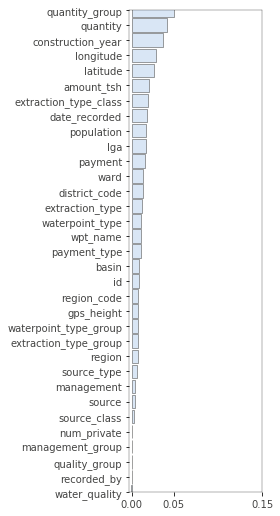

In [193]:
imp = importances(rf, df, pd.DataFrame(y['status_group'])) # permutation
viz = plot_importances(imp)
viz.view()